![banner-pdi](https://user-images.githubusercontent.com/58775072/141189378-b5df3287-e8c0-48a1-ad11-825ba317463b.png)

## Universidade Federal de Campina Grande (UFCG)
## Centro de Engenharia Elétrica e Informática (CEEI) 
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Ribeiro Veloso
## Aluno(a): Samara Lima Cardoso

## Observações
***

1. Os arquivos de laboratório devem ser salvos seguindo o seguinte padrão: `lab-x-nome-sobrenome.ipynb`.
2. Não esqueça de colocar o seu nome no cabeçalho acima.
3. Não altere a ordem das células e realize as implementações somente nos campos específicados.  
4. Ao longo do laboratório será solicitado perguntas teóricas relativas aos assuntos das aulas da disciplina e implementações de código utilizando a linguagem de programação Python. 
5. As células de implementação com código serão indicadas pelos seguintes comentários: `# IMPLEMENTE O SEU CÓDIGO AQUI`.
6. Para editar uma célula de texto, basta clicar duas vezes com o cursos do mouse para editar, e `Ctrl + Enter` para finalizar a edição. 
7. Para rodar as células com os códigos desenvolvidos, digite `Ctrl + Enter` ou clique em `Run` no menu do Jupyter.
8. Dúvidas, problemas de execução de código ou dificuldades com a linguagem de programação Python devem ser feitas durante as aulas de laboratório, encaminhadas para o grupo de WhatsApp da turma ou fórum do PVAE da disciplina.
9. Os laboratórios devem ser enviados nos campos especificados pelo PVAE. ATENTE-SE AOS PRAZOS DE ENTREGA!

# <span style="color:red">Laboratório 5.2: Segmentação em Imagens</span>
***

### Importação dos Pacotes

In [1]:
import os                                    # operational system para manipulação de arquivos
import cv2                                   # opencv para manipulação de imagens
import numpy as np                           # numpy para manipulação de matrizes e arrays
import urllib.request as url                 # urllib para baixar arquivos via HTTPS
import zipfile                               # zipfile para lidar com arquivos compactados
import matplotlib.pyplot as plt              # pyplot para plotagem de gráficos e imagens
import matplotlib.patheffects as PathEffects # função utilitária de plotagem gráfica

In [2]:
# baixando as imagens de referência
url.urlretrieve('https://github.com/Alyssonmach/pdi-labs/raw/main/imagens.zip', 'imagens.zip')
with zipfile.ZipFile('imagens.zip', 'r') as zip_ref:
    zip_ref.extractall('')

### Transformada de Hough

A biblioteca OpenCV disponibiliza funções para a aplicação da Transformada de Hough, viabilizando a identificação de retas e círculos:

1. Detecção de Linhas:  
    * **lines = cv2.HoughLines(src_img, $\rho_{res}$, $\theta_{res}$, threshold)**
    * **src_img** é a imagem de entrada e deve ser uma imagem binária;
    * $\rho_{res}$ controla a sensibilidade da variável $\rho$, em unidades;
    * $\theta_{res}$ controla a sensibilidade da variável $\theta$, em radianos;
    * **threshold** é o limiar do acumulador para que uma linha seja considerada válida;
    * **lines** é um array que armazena as linhas;
        * A variável tem dimensões (L, 1, 2), sendo L o número de linhas detectadas
        * Cada linha tem dimensões (1, 2) -> [$\rho$, $\theta$]
        * A i-ésima linha é acessada por linha = lines[ i ]  
        
2. Detecção de Círculos:
    * **circles = cv2.HoughCircles(src_img, cv2.HOUGH_GRADIENT, dp, dist, param1, param2, minRadius=0, maxRadius=0)**
    * **src_img** é a imagem de entrada;
    * **cv2.HOUGH_GRADIENT** é um flag que determina o método a ser utilizado pelo algoritmo;
    * **dp** controla a resolução da matriz de acumuladores;
    * **dist** controla a distância mínima entre círculos para suprimir múltiplas detecção de um mesmo objeto;
    * **param1** representa o limiar superior de um detector de Canny aplicado internamente à função, o limiar inferior é escolhido como param1/2;
    * **param2** é uma variável análoga ao threshold de cv2.HoughLines e controla o limiar do acumulador para os círculos;
    * **minRadius** e **maxRadius** controlam os valores mínimo e máximo do raio dos círculos detectados. São ignorados se deixados no valor default 0.
    * **circles** é um array que armazena os círculos;
        * A variável tem dimensões **(C, 3)**, sendo C o número de círculos detectados
        * Cada círculo de raio r e centrado em **(x1, y1)** tem dimensões (3) -> [x1, y1, r]

As funções a seguir podem ser utilizadas para desenhar linhas e círculos detectados:      

* **cv2.line(dst_img, (x1,y1), (x2,y2), color, width)**
* **cv2.circle(dst_img, (cx, cy), r, color, width)**
    * **dst_img** é a imagem de saída onde o desenho será feito;
    * **(x1, y1)** e **(x2, y2)** representam pontos do início/fim da linha desenhada;
    * **(cx, cy)** e **r** representam as coordenadas do centro do círculo e o raio, respectivamente;
    * **color** é uma tupla rgb (vermelho, verde, azul) que indica a cor da linha/circulo desenhado;
    * **width** indica a largura das linhas. Pode ser -1 no caso do circulo, indicando que a forma deve ser preenchida;

 ## <span style='color:blue'>Questão 1: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
* (a) O código abaixo realiza a detecção de linhas da imagem **Fig1034(a)(marion_airport).tif** utilizando a transformada de Hough. O que representam os pontos (x0, y0) marcados em ciano?
* (b)  Modifique o código acima para que sejam detectadas apenas as linhas referentes às pistas de pouso do aeroporto. Observe que o parâmetro  em lines é dado em radianos.

Text(0.5, 1.0, 'Detecção de Linhas')

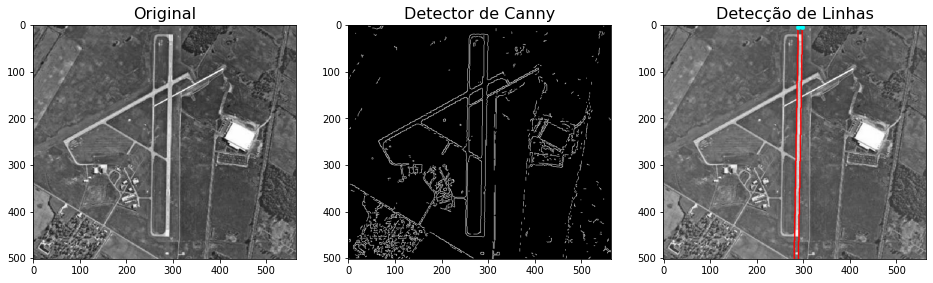

In [38]:
# Lê imagem e converte para escala de cinza
rgb_img = cv2.imread("imagens/Fig1034(a)(marion_airport).tif") [:, :, ::-1]
src_img = cv2.cvtColor( rgb_img, cv2.COLOR_RGB2GRAY )

# Realiza detecção de bordas
canny_output = cv2.Canny(image = src_img, threshold1 = 200, threshold2 = 250, L2gradient = True )

# Realiza detecção de linhas
lines = cv2.HoughLines(image = canny_output,  rho = 1.5 ,  theta = 1 * np.pi / 360 , threshold = 255)

# Desenha as linhas em uma cópia de rgb_img
dst_img = rgb_img.copy()

for line in lines:
    rho   = line[0][0]
    theta = line[0][1]
    
    # Linhas
    x1 = int(rho * np.cos(theta) - 1000 * np.sin(theta))
    y1 = int(rho * np.sin(theta) + 1000 * np.cos(theta))
    x2 = int(rho * np.cos(theta) + 1000 * np.sin(theta))
    y2 = int(rho * np.sin(theta) - 1000 * np.cos(theta))
    cv2.line(img = dst_img, pt1 = (x1,y1), pt2 = (x2,y2), color = (255, 0, 0), thickness = 2)

    # Pontos
    x0 = int(rho * np.cos(theta))
    y0 = int(rho * np.sin(theta))
    cv2.circle(img = dst_img, center = (x0, y0), radius = 5, color = (0, 255, 255), thickness = -1)

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 24))
    
# Imagem Original
axs[0].imshow(src_img, cmap="gray")
axs[0].set_title("Original", fontsize = 16)

# Filtragem
axs[1].imshow(canny_output, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Detector de Canny", fontsize = 16)

# Filtragem
axs[2].imshow(dst_img, vmin = 0, vmax = 255)
axs[2].set_title("Detecção de Linhas", fontsize = 16)

## <span style='color:green'>Respostas da Questão 1:</span>

* representam as coordenadas do centro do círculo e o raio, ou seja, é o ponto pelo qual passa a maior quantidade de retas que se interceptam.

 ## <span style='color:blue'>Questão 2: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>
 
* O código abaixo utiliza a transformada de Hough para circular todos os planetas em um desenho do nosso Sistema Solar. Modifique os parâmetros da função cv2.HoughCircles e tente circular os planetas individualmente. Comente os resultados observados.

In [39]:
def draw_circles(src_img, circles_array, color = (255, 0, 0), width = 1):
    '''Desenha círculos detectadas pela transformada de Hough'''
        
    dst_img = src_img.copy()
    circles_array = np.uint16(np.around(circles_array))
    for circle in circles_array[0]:
        x1, y1, r = circle
        # Circunferência
        cv2.circle(dst_img, (x1, y1), r, color, width)
        # Centro
        cv2.circle(dst_img, (x1, y1), 1, (255, 0, 255), -1)
        
    return dst_img

Text(0.5, 1.0, 'Detecção de Círculos')

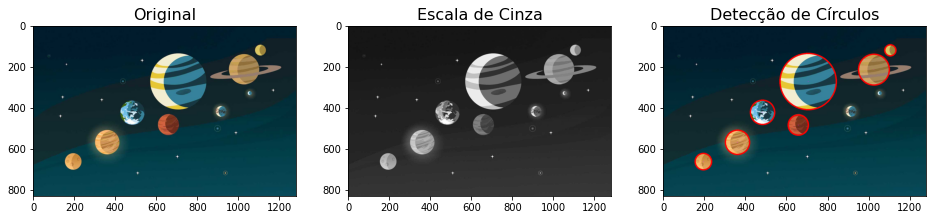

In [40]:
# Lê imagem e converte para escala de cinza
bgr_img = cv2.imread("imagens/planets.jpg") [:, :, ::-1]
src_img = cv2.cvtColor( bgr_img, cv2.COLOR_RGB2GRAY )

# detectando todos os planetas
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=15, maxRadius=150)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 24))
    
# Imagem Original
axs[0].imshow(bgr_img, vmin = 0, vmax = 255, cmap = "gray")
axs[0].set_title("Original", fontsize = 16)

# Filtragem
axs[1].imshow(src_img, vmin = 0, vmax = 255, cmap = "gray")
axs[1].set_title("Escala de Cinza", fontsize = 16)

# Filtragem
axs[2].imshow(dst_img, vmin = 0, vmax = 255)
axs[2].set_title("Detecção de Círculos", fontsize = 16)

Text(0.5, 1.0, 'Todos os Planetas')

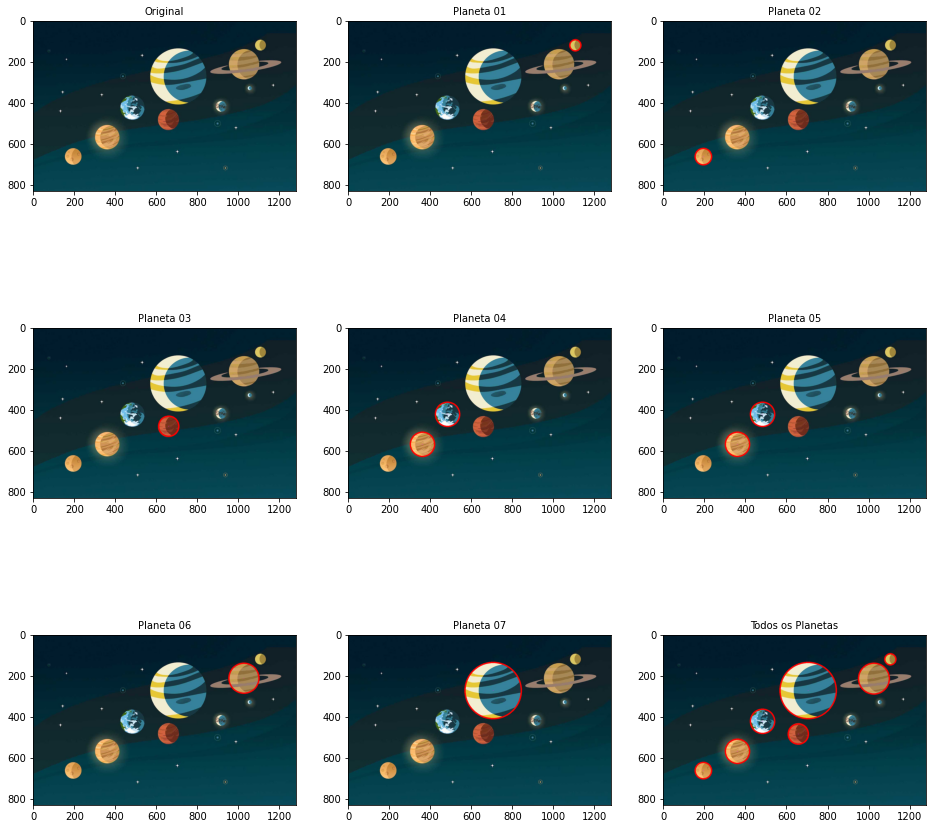

In [41]:
# IMPLEMENTE SEU CÓDIGO AQUI -> QUESTÃO 2 
# Lê imagem e converte para escala de cinza
bgr_img = cv2.imread("imagens/planets.jpg") [:, :, ::-1]
src_img = cv2.cvtColor( bgr_img, cv2.COLOR_RGB2GRAY )


# Plots
fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize=(16, 16))
    
# Linha 01
#originasl
axs[0][0].imshow(bgr_img, vmin = 0, vmax = 255, cmap = "gray")
axs[0][0].set_title("Original", fontsize = 10)

# 
# detectando o planeta
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=15, maxRadius=30)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)
axs[0][1].imshow(dst_img, vmin = 0, vmax = 255)
axs[0][1].set_title("Planeta 01", fontsize = 10)

# detectando o planeta
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=30, maxRadius=45)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)
axs[0][2].imshow(dst_img, vmin = 0, vmax = 255)
axs[0][2].set_title("Planeta 02", fontsize = 10)


# Linha 02
# detectando o planeta
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=45, maxRadius=55)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)
axs[1][0].imshow(dst_img, vmin = 0, vmax = 255)
axs[1][0].set_title("Planeta 03", fontsize = 10)

# detectando o planeta
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=55, maxRadius=60)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)
axs[1][1].imshow(dst_img, vmin = 0, vmax = 255)
axs[1][1].set_title("Planeta 04", fontsize = 10)

#
# detectando o planeta
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=55, maxRadius=60)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)
axs[1][2].imshow(dst_img, vmin = 0, vmax = 255)
axs[1][2].set_title("Planeta 05", fontsize = 10)

# Linha 03
# detectando o planeta
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=65, maxRadius=75)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)
axs[2][0].imshow(dst_img, vmin = 0, vmax = 255)
axs[2][0].set_title("Planeta 06", fontsize = 10)

#
# detectando o planeta
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=75, maxRadius=150)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)
axs[2][1].imshow(dst_img, vmin = 0, vmax = 255)
axs[2][1].set_title("Planeta 07", fontsize = 10)

# detectando todos os planetas
circles = cv2.HoughCircles(src_img,cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=50, minRadius=15, maxRadius=150)
dst_img = draw_circles(bgr_img, circles, color = (255, 0, 0), width = 5)
axs[2][2].imshow(dst_img, vmin = 0, vmax = 255)
axs[2][2].set_title("Todos os Planetas", fontsize = 10)



## <span style='color:green'>Respostas da Questão 2:</span>

* Os resultador sairam como o esperado. De acordo com a variação do MinRadius e MaxRadius os planetas foram sendo detectados. 

### Segmentação por Limiarização
A biblioteca OpenCV disponibiliza funções para a limiarização de imagens:

1. Limiarização com limiar global:  
    * **limiar, th1 = cv2.threshold( src_img, limiar, vmax, cv2.THRESH_BINARY )**
2. Limiarização com limiar global escolhido automaticamente:
    * **limiar, th1 = cv2.threshold( src_img, 0, vmax, cv2.THRESH_BINARY + cv2.THRESH_OTSU )**
3. Limiarização com limiar local escolhido automaticamente:
    * **th1 = cv2.adaptiveThreshold(src_img, vmax, flag, cv2.THRESH_BINARY, block_size, C)**
    
As variáveis listadas correspondem a:
* **src_img** é a imagem de entrada;
* **limiar** é o valor global de limiarização;
* **vmax** é o valor para o qual os pixels acima do limiar são setados;
* **cv2.THRESH_BINARY** é um flag que indica o tipo de limiarização a ser executado. Outras opções estão disponíveis;
* **block_size** define o tamanho da janela utilizada na limiarização adaptativa;
* **C** é uma constante que controla a definição do limiar local;
* **flag** define a forma como o limiar local é definido:
    * Se for **cv2.ADAPTIVE_THRESH_MEAN_C** o limiar local é definido como a média da vizinhança menos C
    * Se for **cv2.ADAPTIVE_THRESH_GAUSSIAN_C** o limiar local é definido como uma soma ponderada gaussiana da vizinhança menos C

 ## <span style='color:blue'>Questão 3: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>
* O código abaixo realiza a segmentação de um marca-passo a partir de uma imagem de raio-x. Analise o código e comente sobre os passos executados nesse processo.

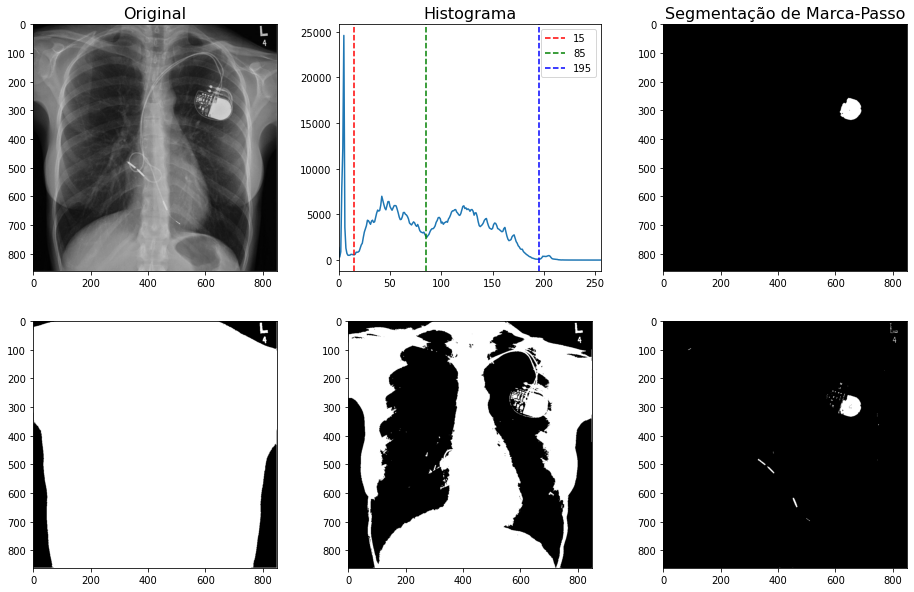

In [42]:
src_img = cv2.imread("imagens/pacemaker.png", 0 )
hist = cv2.calcHist([src_img], [0], None, [256], [0,256])
    
_, th1 = cv2.threshold(src_img, 15, 255, cv2.THRESH_BINARY)
_, th2 = cv2.threshold(src_img, 85, 255, cv2.THRESH_BINARY)
_, th3 = cv2.threshold(src_img, 195, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
th4 = cv2.erode(th3, kernel, iterations = 4)
th4 = cv2.dilate(th4, kernel, iterations = 5)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0][0].imshow(src_img, vmin = 0, vmax = 255, cmap = "gray")
axs[0][0].set_title("Original", fontsize = 16)

# Histograma
axs[0][1].plot(hist)
axs[0][1].set_xlim([0,256])
axs[0][1].axvline(x = 15, label = "15", c = "r", ls = "--")
axs[0][1].axvline(x = 85, label = "85", c = "g", ls = "--")
axs[0][1].axvline(x = 195, label = "195", c = "b", ls = "--")
axs[0][1].set_title("Histograma", fontsize = 16)
axs[0][1].legend()

# Segmentação de Marca-Passo
axs[0][2].imshow(th4, vmin = 0, vmax = 255, cmap = "gray")
axs[0][2].set_title("Segmentação de Marca-Passo", fontsize = 16)

axs[1][0].imshow(th1, vmin = 0, vmax = 255, cmap = "gray")
axs[1][1].imshow(th2, vmin = 0, vmax = 255, cmap = "gray")
axs[1][2].imshow(th3, vmin = 0, vmax = 255, cmap = "gray")

## <span style='color:green'>Respostas da Questão 3:</span>

* A imagem sofre três limiarizações binarias. A 1º foi realizada com um limiar de 15, a 2º com um limiar de 85 e a terceira cok um limaiar de 195. Sendo que em todaas elas os pixels acima do limiar ficam brancos. Logo depois, foi realizado o processo de erosão e dilatação na imagem que é resultado da limiarizaçãi com o limiar mais alto, para assim saber com maior precisão onde esta localizado o marca-passo. Também foi gerado um histograma para verificação da quantidade de elementos nos limiares de 15, 85 e 195. Por fim são plotados os resultados

 ## <span style='color:blue'>Questão 4: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
* (a) O código abaixo realiza a segmentação de uma imagem utilizando limiarização de Otsu e limiarização Adaptativa. Qual método foi mais bem sucedido? Por que esse método funcionou melhor que os outros?
* (b) Em seguida, o próximo código realiza a segmentação de uma imagem utilizando limiarização de Otsu e limiarização Adaptativa. Qual método foi mais bem sucedido? Por que esse método funcionou melhor que os outros?
* (c) Qual a função do filtro gaussiano é aplicada antes da limiarização? A sua retirada produz efeitos significativos nas imagens dos itens a e b? Experimente também em outras figuras da pasta de imagens e comente os resultados.

Text(0.5, 1.0, 'ADAPTIVE_THRESH_GAUSSIAN_C')

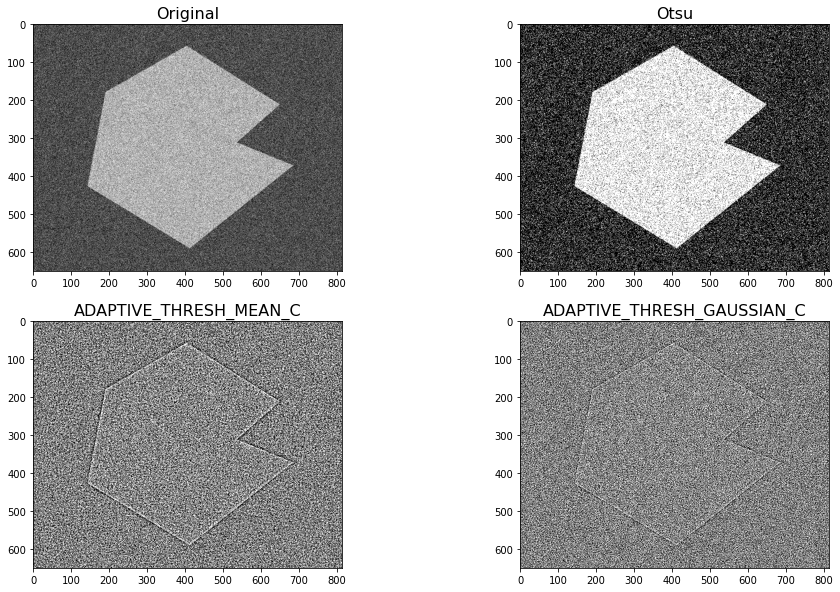

In [43]:
# CÓDIGO DE REFERÊNCIA --> QUESTÃO 4 - letra (a)
src_img = cv2.imread("imagens/Fig1036(c)(gaussian_noise_mean_0_std_50_added).tif", 0)
#src_img = cv2.GaussianBlur(src_img,(5,5),0)
hist = cv2.calcHist([src_img], [0], None, [256], [0,256])
    
limiar, th1 = cv2.threshold(src_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th2 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))
    
# Imagem Original
axs[0][0].imshow(src_img, vmin = 0, vmax = 255, cmap = "gray")
axs[0][0].set_title("Original", fontsize = 16)

axs[0][1].imshow(th1, vmin = 0, vmax = 255, cmap = "gray")
axs[0][1].set_title("Otsu", fontsize = 16)

axs[1][0].imshow(th2, vmin = 0, vmax = 255, cmap = "gray")
axs[1][0].set_title("ADAPTIVE_THRESH_MEAN_C", fontsize = 16)

axs[1][1].imshow(th3, vmin = 0, vmax = 255, cmap = "gray")
axs[1][1].set_title("ADAPTIVE_THRESH_GAUSSIAN_C", fontsize = 16)

Text(0.5, 1.0, 'ADAPTIVE_THRESH_GAUSSIAN_C')

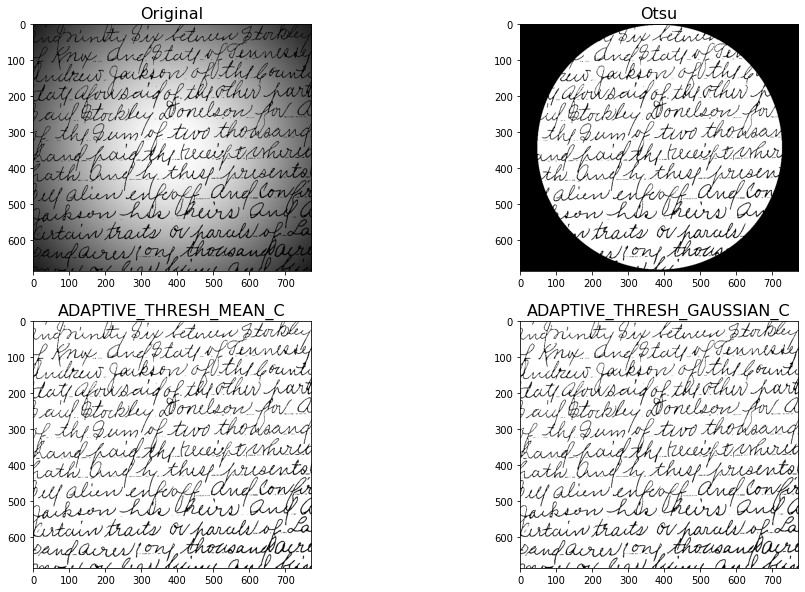

In [44]:
# CÓDIGO DE REFERÊNCIA --> QUESTÃO 4 - letra (b) 
src_img = cv2.imread( os.path.join(".", "imagens", "Fig1049(a)(spot_shaded_text_image).tif"), 0)
#src_img = cv2.GaussianBlur(src_img,(5,5),0)
hist = cv2.calcHist([src_img], [0], None, [256], [0,256])
    
limiar, th1 = cv2.threshold( src_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th2 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plots
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))
    
# Imagem Original
axs[0][0].imshow(src_img, vmin = 0, vmax = 255, cmap = "gray")
axs[0][0].set_title("Original", fontsize = 16)

axs[0][1].imshow(th1, vmin = 0, vmax = 255, cmap = "gray")
axs[0][1].set_title("Otsu", fontsize = 16)

axs[1][0].imshow(th2, vmin = 0, vmax = 255, cmap = "gray")
axs[1][0].set_title("ADAPTIVE_THRESH_MEAN_C", fontsize = 16)

axs[1][1].imshow(th3, vmin = 0, vmax = 255, cmap = "gray")
axs[1][1].set_title("ADAPTIVE_THRESH_GAUSSIAN_C", fontsize = 16)

Text(0.5, 1.0, 'ADAPTIVE_THRESH_GAUSSIAN_C')

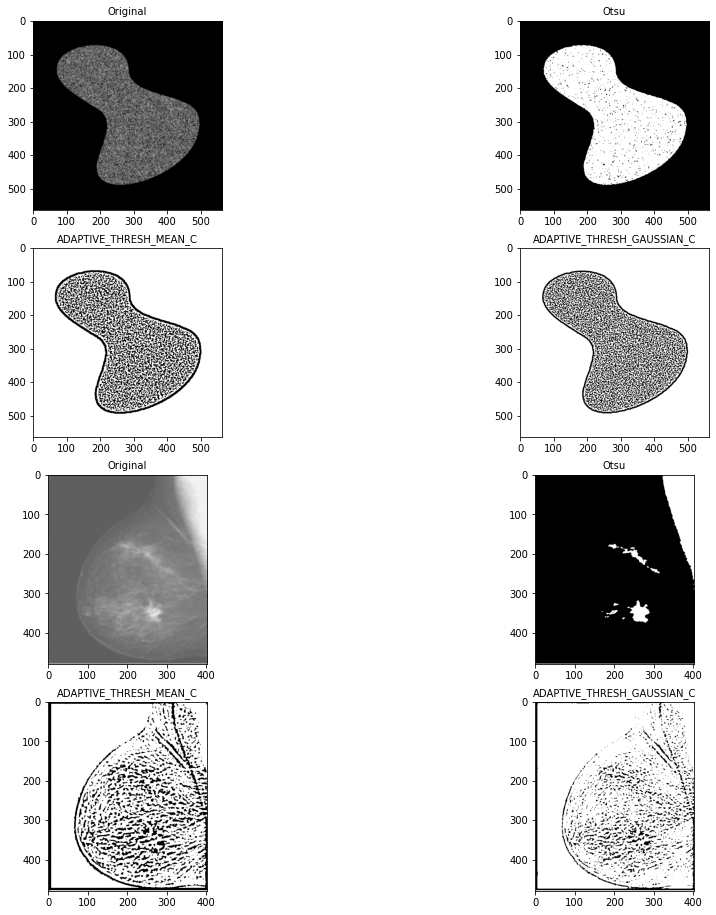

In [45]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 4 - letra (c)
src_img = cv2.imread("imagens/Fig1001(e)(edge_noisy_image).tif", 0)
src_img = cv2.GaussianBlur(src_img,(5,5),0)
    
limiar, th1 = cv2.threshold(src_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th2 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Plots
fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (16, 16))
    
# Imagem Original
axs[0][0].imshow(src_img, vmin = 0, vmax = 255, cmap = "gray")
axs[0][0].set_title("Original", fontsize = 10)

axs[0][1].imshow(th1, vmin = 0, vmax = 255, cmap = "gray")
axs[0][1].set_title("Otsu", fontsize = 10)

axs[1][0].imshow(th2, vmin = 0, vmax = 255, cmap = "gray")
axs[1][0].set_title("ADAPTIVE_THRESH_MEAN_C", fontsize = 10)

axs[1][1].imshow(th3, vmin = 0, vmax = 255, cmap = "gray")
axs[1][1].set_title("ADAPTIVE_THRESH_GAUSSIAN_C", fontsize = 10)


src_img = cv2.imread("imagens/mamografia.JPG", 0)
src_img = cv2.GaussianBlur(src_img,(5,5),0)
    
limiar, th1 = cv2.threshold(src_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
th2 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(src_img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


axs[2][0].imshow(src_img, vmin = 0, vmax = 255, cmap = "gray")
axs[2][0].set_title("Original", fontsize = 10)

axs[2][1].imshow(th1, vmin = 0, vmax = 255, cmap = "gray")
axs[2][1].set_title("Otsu", fontsize = 10)

axs[3][0].imshow(th2, vmin = 0, vmax = 255, cmap = "gray")
axs[3][0].set_title("ADAPTIVE_THRESH_MEAN_C", fontsize = 10)

axs[3][1].imshow(th3, vmin = 0, vmax = 255, cmap = "gray")
axs[3][1].set_title("ADAPTIVE_THRESH_GAUSSIAN_C", fontsize = 10)

## <span style='color:green'>Respostas da Questão 4:</span>

* (a) Otsu, pois a imagem de entrada possui ruido. Logo, o metodo Otsu calcula automaticamente o melhor limiar
* (b) Adaptativa, pois a imagem possui condições diversas de iluminação em diferentes áreas.Logo, o limiar adaptativo teve maior exito que os demais pois ele determina o limite para um pixel com base em uma pequena região ao seu redor. Obtendo diferentes limiares para diferentes regiões da mesma imagem, o que fornece melhores resultados para imagens com iluminação variável.
* (c) Na primeira imagem(contem ruido) o efeito é mais significativo do que na segunda. pois ele é aplicado para remover o ruído, então o limiar Otsu é aplicado. Pois com a filtragem de ruído melhora o resultado. Ao aplicar para diferentes imagens é possivel perceber que as segmentações apresentam perfomances difentes para as imagens. 

### Segmentação por Cor

Utilizando espaço de cores como HSV é possível segmentar imagens a partir das cores de objetos. Nesse contexto, a biblioteca OpenCV disponibiliza funções para a conversão de espaço de cores e para a filtragem das imagens coloridas:

1. **Conversão RGB -> HSV**:  
    * **hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)**
    * O canal **H** corresponde à tonalidade da cor e determina o ângulo no cilindro da figura abaixo. Varia de 0 a 180 sendo cada unidade correspondente a 2 graus no ângulo descrito;
    * O canal **S** corresponde à saturação e determina a pureza das cores, quanto menor o valor de S mais diluído em cinza é a tonalidade da cor, determina o raio no cilindro da figura abaixo. Varia de 0 a 255;
    * O canal **V** corresponde à intensidade luminosa (ou brilho) e determina a altura no cilindro da figura abaixo. O canal V pode ser pensado como a imagem em escala de cinza. Varia de 0 a 255;
2. Seleção de elementos intermediários:
    * **mask = cv2.inRange(src_img, lower_bound, higher_bound)**
    * **src_img** é a imagem de entrada;
    * **lower_bound** é um array que determina limiares inferiores;
    * **higher_bound** é um array que determina limiares superiores;
    * **mask** é uma imagem binária cujos pixels tem valor alto (255) se os respectivos valores de src_img estão entre os valores de lower_bound e higher_bound para todas as coordenadas;
    
Observações:

* Vermelho se localiza nos arredores de 0 graus.
* Amarelo se localiza nos arredores de 60 graus.
* Verde se localiza nos arredores de 120 graus.
* Ciano se localiza nos arredores de 180 graus.
* Azul se localiza nos arredores de 240 graus.
* Magenta se localiza nos arredores de 300 graus.
* Tons mais específicos podem ser localizados empiricamente.
* O valor no OpenCV é o nº de graus dividido por 2.

![image](https://user-images.githubusercontent.com/58775072/142745820-b48af5ef-d0c0-4b50-b112-0e0dc6705651.png)

 ## <span style='color:blue'>Questão 5: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
 
* (a) O código abaixo realiza a segmentação de uma maçã na imagem **apple.jpg** a partir da sua cor. Analise o código e comente os resultados produzidos.
    * O que acontece se a etapa de erosão for retirada? 
    * E a etapa de dilatação? 
* (b) Seria possível realizar um processo semelhante utilizando o espaço RGB?. Quais seriam as principais dificuldades de se utilizar esse espaço de cores?

Text(0.5, 1.0, 'Combinação')

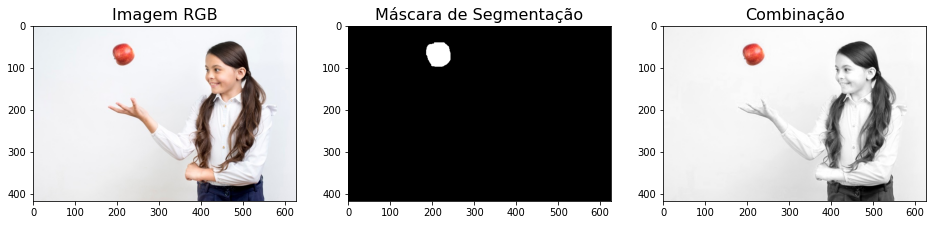

In [46]:
# Carrega a imagem e converte
rgb_img = cv2.imread("imagens/apple.jpg" )[:,:,::-1]
hsv_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)

# Filtragem por cor
min_HUE =   0; max_HUE = 30
min_SAT = 145; max_SAT = 255
min_VAL = 135; max_VAL = 255
mask = cv2.inRange(hsv_img, (min_HUE, min_SAT, min_VAL), (max_HUE, max_SAT, max_VAL))
H, W = mask.shape

# Supressão de ruído
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
mask = cv2.erode(mask, kernel, iterations = 1)

# Preenchimento de buracos
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
mask = cv2.dilate(mask, kernel, iterations = 3)

# Aplicação de máscaras
color_img = cv2.bitwise_and(rgb_img, rgb_img, mask=mask)
gray_img = cv2.bitwise_and(hsv_img[:,:, 2], hsv_img[:,:, 2], mask=~mask)

# O reshape serve apenas pra poder somar as imagens
dst_img = gray_img.reshape( ( H, W, 1 ) ) + color_img

# Plots
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(16, 10))
    
# Imagem Original
axs[0].imshow(rgb_img, vmin = 0, vmax = 255, cmap="gray")
axs[0].set_title("Imagem RGB", fontsize = 16)

axs[1].imshow(mask, vmin = 0, vmax = 255, cmap="gray")
axs[1].set_title("Máscara de Segmentação", fontsize = 16)

axs[2].imshow(dst_img, vmin = 0, vmax = 255, cmap="gray")
axs[2].set_title("Combinação", fontsize = 16)

In [47]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 5 NÃO FOI PEDIDO CODIGO NO ENUNCIADO

## <span style='color:green'>Respostas da Questão 5:</span>

* (a) Como na etapa de erosão são removido os rruidos. Se retirarmos ela, os ruidos que possuem a tonalidade desejada ficam na imagem. Logo, após a combinação a imagem final tera presente esse ruidos. Se retirarmos a de dilatação, etapa que preenche os buracos que  faltam a tonalidade desejada na maça, a imagem final faltara pedaços da maça. 
* (b) seria entretanto O modelo RGB possui uma grande desvantagem, ele não é adequado para definir cores com base no sistema de percepção visual humana. Isso significa que não há garantia de que cores com representações próximas no espaço RGB serão visualmente próximas perceptivelmente. Pode ser difícil determinar visualmente exatamente se uma cor é de interesse.

 ## <span style='color:blue'>Questão 6: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>
* Carregue a imagem **frutas.jpg** como uma imagem colorida e segmente os elementos pedidos.
    * Localize apenas as uvas. 
    * Localize apenas os kiwis.
    * Localize apenas os abacaxis.
    * Localize as uvas, kiwis e os abacaxis.
    * Localize os morangos e as framboesas.
    * Nessa questão não é necessário utilizar morfologia matemática.

In [48]:
def add_masks(image_rgb, mask):
    '''Função para somar as duas máscaras em uma imagem só'''
    
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    high, width = mask.shape[0], mask.shape[1]
    color_img = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)
    gray_img = cv2.bitwise_and(image_hsv[:,:, 2], image_hsv[:,:, 2], mask=~mask)
    dst_img = gray_img.reshape( (high, width, 1 ) ) + color_img
    
    return dst_img

In [49]:
def color_filtering(image_rgb, lower, higher):
    '''Aplica a segmentação por cores na imagem'''
    
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(image_hsv, lower, higher)
    dst_img = add_masks(image_rgb, mask)
    
    return dst_img, mask

Text(0.5, 1.0, 'Abacaxi')

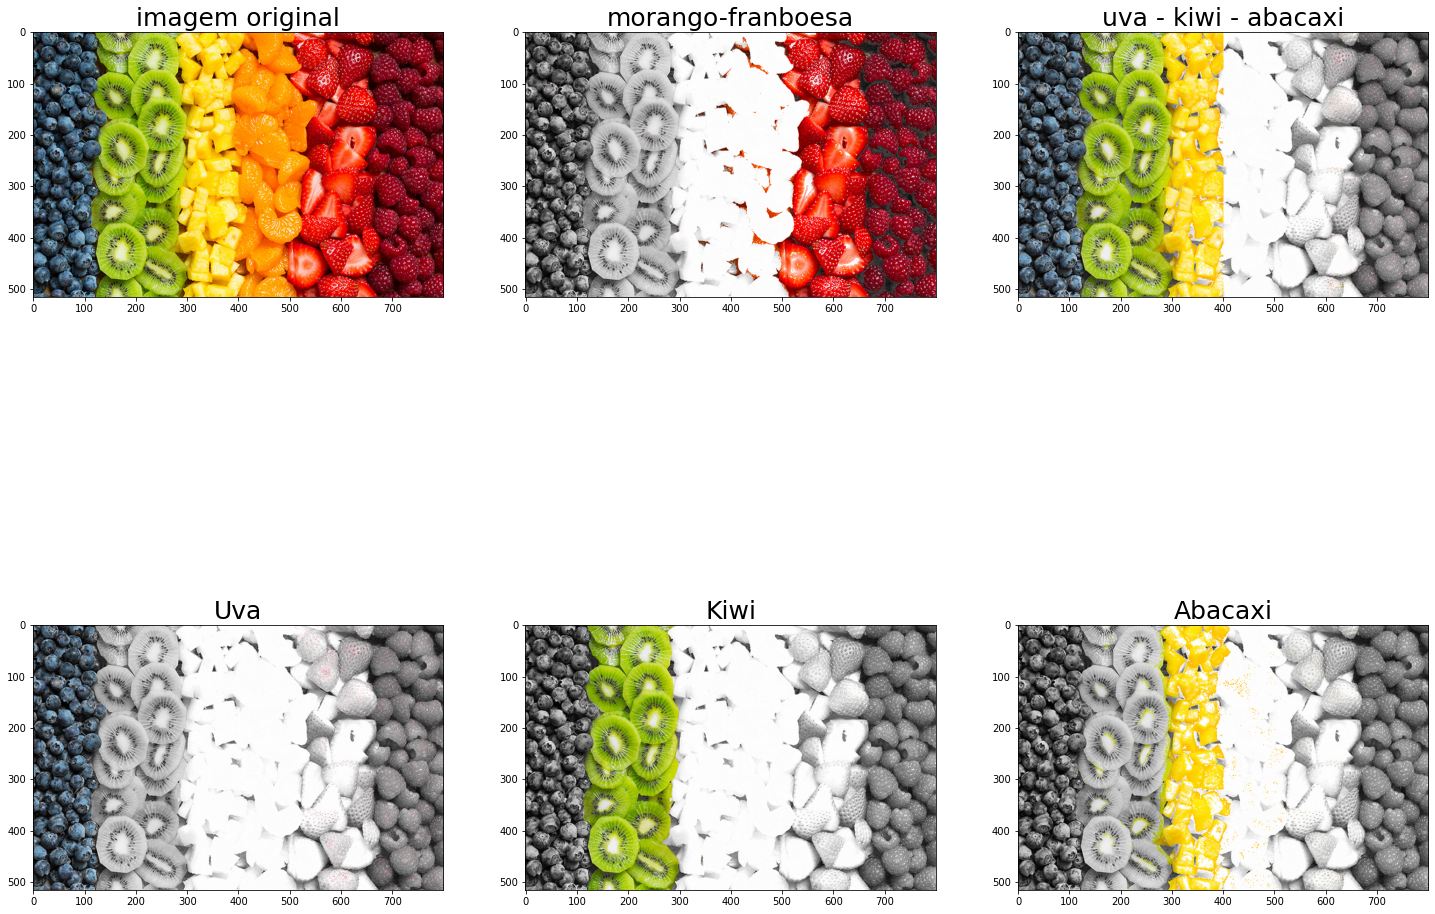

In [50]:
# IMPLEMENTE SEU CÓDIGO AQUI --> QUESTÃO 6 
image_rgb = cv2.imread("imagens/frutas.jpg")
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(25, 20))


axs[0,0].imshow(image_rgb, vmin = 0, vmax = 255)
axs[0,0].set_title("imagem original", fontsize = 25)

_, m2_a = color_filtering(image_rgb, (0, 75, 75), (10, 255, 255))
_, m2_b = color_filtering(image_rgb, (155, 75, 75), (180, 255, 255))
m2 = (m2_a + m2_b)
m2[:,600:600] = 0
im2 = add_masks(image_rgb, m2)
axs[0,1].imshow(im2, vmin = np.min(im2), vmax = np.max(im2))
axs[0,1].set_title("morango-franboesa", fontsize = 25)

_, m1_a = color_filtering(image_rgb, (20, 75, 75), (40, 255, 255))
_, m1_b = color_filtering(image_rgb, (100, 20, 20), (360, 125, 255))
m1 = (m1_a + m1_b)
m1[:,400:600] = 0
im1 = add_masks(image_rgb, m1)
axs[0,2].imshow(im1, vmin = np.min(im1), vmax = np.max(im1))
axs[0,2].set_title("uva - kiwi - abacaxi", fontsize = 25)

im3, m3 = color_filtering(image_rgb, (100, 20, 20), (360, 125, 255))
axs[1,0].imshow(im3, vmin = np.min(im3), vmax = np.max(im3))
axs[1,0].set_title("Uva", fontsize = 25)

im4, m4 = color_filtering(image_rgb, (30, 75, 75), (75, 255, 255))
axs[1,1].imshow(im4, vmin = np.min(im4), vmax = np.max(im4))
axs[1,1].set_title("Kiwi", fontsize = 25)

im5, m5 = color_filtering(image_rgb, (22, 125, 125), (32, 255, 255))
axs[1,2].imshow(im5, vmin = np.min(im5), vmax = np.max(im5))
axs[1,2].set_title("Abacaxi", fontsize = 25)

Text(0.5, 1.0, 'Joia da Mente')

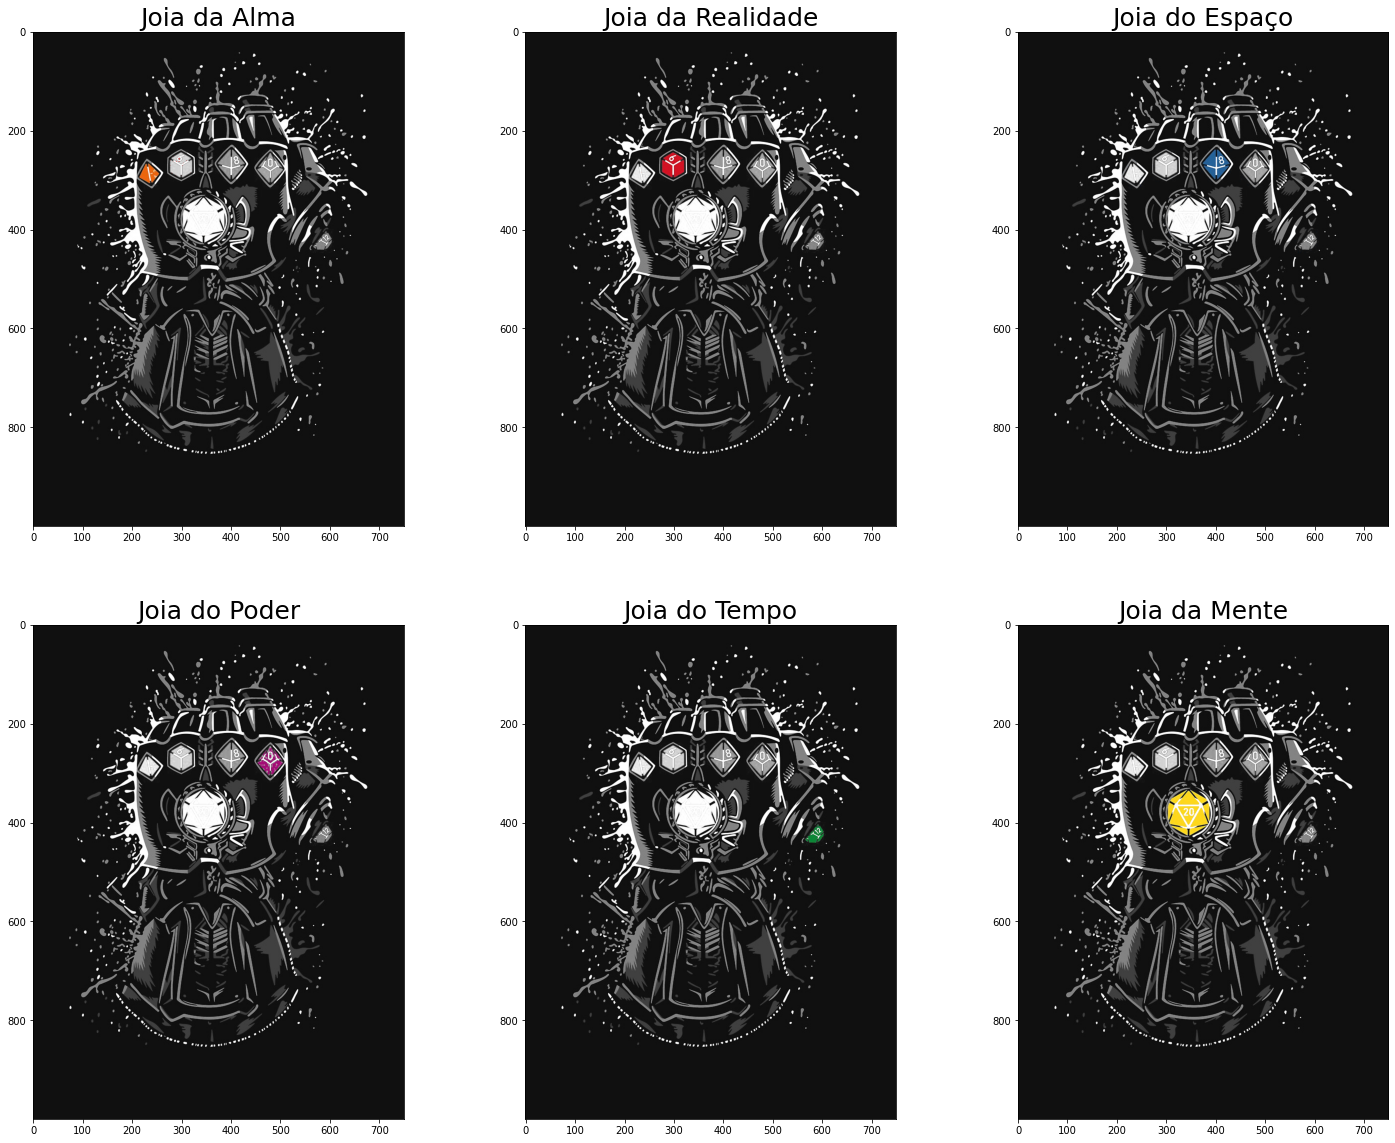

In [51]:
# uma pequena ajudinha para ajudar na questão acima :)
image_rgb = cv2.imread("imagens/manopla.jpg")
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize=(25, 20))

im0, m0 = color_filtering(image_rgb, (0, 75, 75), (20, 255, 255))
axs[0,0].imshow(im0, vmin = np.min(im0), vmax = np.max(im0))
axs[0,0].set_title("Joia da Alma", fontsize = 25)

_, m1_a = color_filtering(image_rgb, (0, 75, 75), (8, 255, 255))
_, m1_b = color_filtering(image_rgb, (155, 75, 75), (180, 255, 255))
m1 = (m1_a + m1_b)
m1[:,400:600] = 0
im1 = add_masks(image_rgb, m1)
axs[0,1].imshow(im1, vmin = np.min(im1), vmax = np.max(im1))
axs[0,1].set_title("Joia da Realidade", fontsize = 25)

im2, m2 = color_filtering(image_rgb, (100, 0, 0), (120, 255, 255))
axs[0,2].imshow(im2, vmin = np.min(im2), vmax = np.max(im2))
axs[0,2].set_title("Joia do Espaço", fontsize = 25)

im3, m3 = color_filtering(image_rgb, (155, 75, 75), (160, 255, 255))
axs[1,0].imshow(im3, vmin = np.min(im3), vmax = np.max(im3))
axs[1,0].set_title("Joia do Poder", fontsize = 25)

im4, m4 = color_filtering(image_rgb, (60, 75, 75), (75, 255, 255))
axs[1,1].imshow(im4, vmin = np.min(im4), vmax = np.max(im4))
axs[1,1].set_title("Joia do Tempo", fontsize = 25)

im5, m5 = color_filtering(image_rgb, (22, 125, 125), (32, 255, 255))
axs[1,2].imshow(im5, vmin = np.min(im5), vmax = np.max(im5))
axs[1,2].set_title("Joia da Mente", fontsize = 25)

***
![image](https://user-images.githubusercontent.com/58775072/156389441-dc11c7ed-4be1-4165-9b7b-30d1f3bf72bb.gif)